In [48]:
# Exp Data Analysis
# https://towardsdatascience.com/a-machine-learning-project-predicting-used-car-prices-efbc4d2a4998#eced
# https://likegeeks.com/python-correlation-matrix/

In [123]:
%matplotlib inline

import quandl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from dateutil.parser import parse
from sklearn import metrics

In [124]:
dfX = pd.read_csv("portfolio.csv", sep='\t')
dfX.set_index('Date')

,AAPL,AMZN,EXC,NDAQ,RGLD,Portfolio Val
Date,,,,,,
2015-07-01,2500.000000,2500.000000,1000.000000,3000.000000,1000.000000,10000.000000
2015-07-02,2496.840442,2501.829031,1010.085093,3025.867378,1020.802621,10055.424566
2015-07-06,2488.151659,2492.283774,1006.618342,3003.079450,1038.902539,10029.035764
2015-07-07,2482.030016,2496.170466,1032.776552,3008.006569,1009.500410,10028.484013
2015-07-08,2420.418641,2456.046092,1027.418847,2947.649353,1011.711712,9863.244645
...,...,...,...,...,...,...
2017-12-22,3608.659917,6678.021903,1340.219995,4888.929875,1467.426587,17983.258276
2017-12-26,3517.108291,6726.033974,1333.348834,4891.499952,1485.905041,17953.896092
2017-12-27,3517.726883,6757.470450,1339.532879,4904.992859,1470.308547,17990.031618


In [125]:
dfX = dfX[['Portfolio Val']]
dfX['Portfolio Val'] = dfX['Portfolio Val'].astype(float)
dfX

,Portfolio Val
0,10000.000000
1,10055.424566
2,10029.035764
3,10028.484013
4,9863.244645
...,...
624,17983.258276
625,17953.896092
626,17990.031618
627,17974.392222


In [127]:
data = pd.read_csv("S&P500.csv")
data['Date']  # as a Series
date_array = data['Date'].values  # as a numpy array
d_list = []
for date in date_array:
    dt = parse(date)
    d_item = (str(dt.date()))    
    d_list.append(d_item)
dfDate = pd.DataFrame(d_list,columns=['Date'])
dfDate.set_index('Date')
dfSP500 = pd.read_csv("S&P500.csv")
dfSP500.set_index('Date')
dfSP500 = dfSP500.rename(columns={'Price':'SP500', 'Date':'ODate'})

for i, col in enumerate(dfSP500.columns):
    dfSP500.iloc[:, i] = dfSP500.iloc[:, i].str.replace(',', '')
    
dfSP500 = dfSP500.join(dfDate)
dfSP500 = dfSP500.dropna()
dfSP500 = dfSP500[['SP500']]
dfSP500['SP500'] = dfSP500['SP500'].astype(float)
dfSP500 = dfSP500[::-1]
dfSP500.reset_index(inplace=True, drop=True)

In [128]:
dfX = dfX.join(dfSP500)
dfX.dropna()

,Portfolio Val,SP500
0,10000.000000,2077.42
1,10055.424566,2076.78
2,10029.035764,2068.76
3,10028.484013,2081.34
4,9863.244645,2046.68
...,...,...
624,17983.258276,2679.25
625,17953.896092,2684.57
626,17990.031618,2683.34
627,17974.392222,2680.50


In [129]:
dfX['Rolling_mean_PV'] = dfX['Portfolio Val'].rolling(5).mean()
dfX['Rolling_std_PV'] = dfX['Portfolio Val'].rolling(5).std()
dfX['upper_band_PV'] = dfX['Rolling_mean_PV']+ (2*dfX['Rolling_std_PV'])
dfX['lower_band_PV'] = dfX['Rolling_mean_PV']- (2*dfX['Rolling_std_PV'])
dfX['BB'] = (dfX['Portfolio Val']- dfX['Rolling_mean_PV'])/(2*dfX['Rolling_std_PV'])
dfX.fillna(dfX.mean())

,Portfolio Val,SP500,Rolling_mean_PV,Rolling_std_PV,upper_band_PV,lower_band_PV,BB
0,10000.000000,2077.42,13369.735506,104.566367,13578.868239,13160.602773,0.107968
1,10055.424566,2076.78,13369.735506,104.566367,13578.868239,13160.602773,0.107968
2,10029.035764,2068.76,13369.735506,104.566367,13578.868239,13160.602773,0.107968
3,10028.484013,2081.34,13369.735506,104.566367,13578.868239,13160.602773,0.107968
4,9863.244645,2046.68,9995.237797,76.346138,10147.930074,9842.545520,-0.864439
...,...,...,...,...,...,...,...
624,17983.258276,2679.25,18034.986713,109.541511,18254.069735,17815.903691,-0.236113
625,17953.896092,2684.57,17983.406597,50.021882,18083.450361,17883.362832,-0.294976
626,17990.031618,2683.34,17967.594727,19.109936,18005.814600,17929.374854,0.587048
627,17974.392222,2680.50,17973.523356,14.224080,18001.971516,17945.075196,0.030542


In [130]:
dfX.describe()

,Portfolio Val,SP500,Rolling_mean_PV,Rolling_std_PV,upper_band_PV,lower_band_PV,BB
count,629.000000,629.000000,625.000000,625.000000,625.000000,625.000000,625.000000
mean,13373.595923,2223.049141,13369.735506,104.566367,13578.868239,13160.602773,0.107968
std,2352.693243,207.102255,2335.808491,65.500885,2324.243397,2354.616353,0.503634
min,9500.286457,1829.080000,9839.985634,5.041378,10144.953111,9048.230215,-0.887889
25%,11281.620234,2071.180000,11271.397308,61.324932,11466.753995,11091.556441,-0.302416
50%,13302.268737,2168.270000,13303.927717,90.126445,13519.850888,13092.697880,0.202620
75%,15365.576956,2396.920000,15363.311964,135.399861,15604.631598,15041.415126,0.546905
max,18309.025416,2690.160000,18207.281931,528.000548,18504.266930,18027.006482,0.894274


<AxesSubplot:>

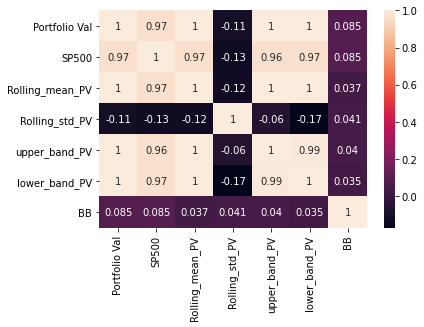

In [194]:
import matplotlib.pylab as plt
import seaborn as sns
# calculate correlation matrix
corr = dfX.corr()# plot the heatmap
sns.heatmap(corr, annot=True)
#xticklabels=corr.columns, yticklabels=corr.columns,
#, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [188]:
X_head = dfX.iloc[:, dfX.columns != 'Portfolio Val']

In [156]:
dfX[4:].to_csv('XY_var.csv', sep='\t', encoding='utf-8')

In [157]:
y = pd.read_csv("XY_var.csv", sep='\t')

In [158]:
y = y['Portfolio Val'].to_numpy()

In [159]:
y.shape

(625,)

In [160]:
x = pd.read_csv("XY_var.csv", sep='\t')

In [161]:
x = x[['SP500', 'Rolling_mean_PV', 'Rolling_std_PV', 'upper_band_PV', 'lower_band_PV', 'BB']]

In [162]:
x = x.to_numpy()

In [163]:
x.shape

(625, 6)

In [164]:
x

array([[ 2.04668000e+03,  9.99523780e+03,  7.63461385e+01,
         1.01479301e+04,  9.84254552e+03, -8.64438959e-01],
       [ 2.05131000e+03,  9.98010241e+03,  8.24253526e+01,
         1.01449531e+04,  9.81525170e+03, -3.38362906e-01],
       [ 2.07662000e+03,  9.99044516e+03,  9.63140651e+01,
         1.01830733e+04,  9.79781703e+03,  6.05795175e-01],
       ...,
       [ 2.68334000e+03,  1.79675947e+04,  1.91099364e+01,
         1.80058146e+04,  1.79293749e+04,  5.87047761e-01],
       [ 2.68050000e+03,  1.79735234e+04,  1.42240800e+01,
         1.80019715e+04,  1.79450752e+04,  3.05421013e-02],
       [ 2.68262000e+03,  1.79516035e+04,  5.49079611e+01,
         1.80614194e+04,  1.78417876e+04, -8.66578690e-01]])

In [165]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# Decision Tree Model

In [166]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

<AxesSubplot:>

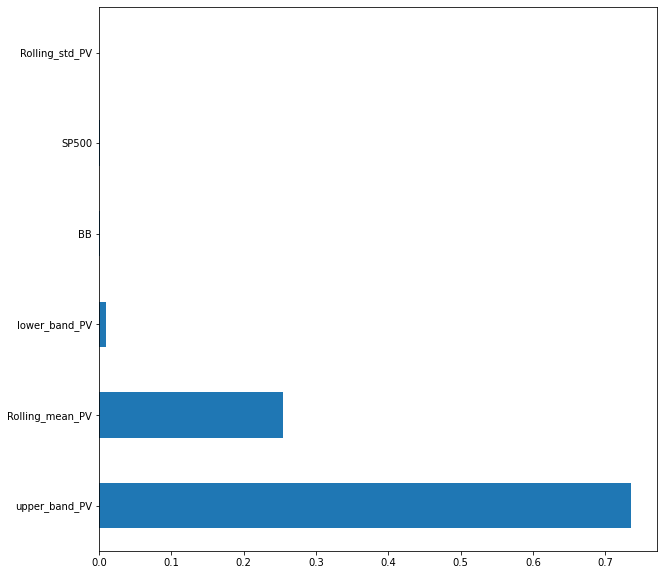

In [190]:
feat_importances = pd.Series(regressor.feature_importances_, index=X_head.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [167]:
y_pred = regressor.predict(x_test)

In [168]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,16578.005608,16488.048146
1,10896.888664,10822.477002
2,10510.768142,10728.657566
3,16589.798219,16611.712650
4,12186.537554,12105.487029
...,...,...
120,13227.259515,13141.932625
121,11169.249865,11229.529024
122,12722.793578,12707.180094
123,15569.958674,15584.191935


In [169]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 71.80692044341295
Mean Squared Error: 17659.93364948476
Root Mean Squared Error: 132.8906830800593


# Random Forest Regressor

In [179]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50)

In [180]:
model = RandomForestRegressor(random_state=0).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9997109769438164, 0.9971896265304246)

<AxesSubplot:>

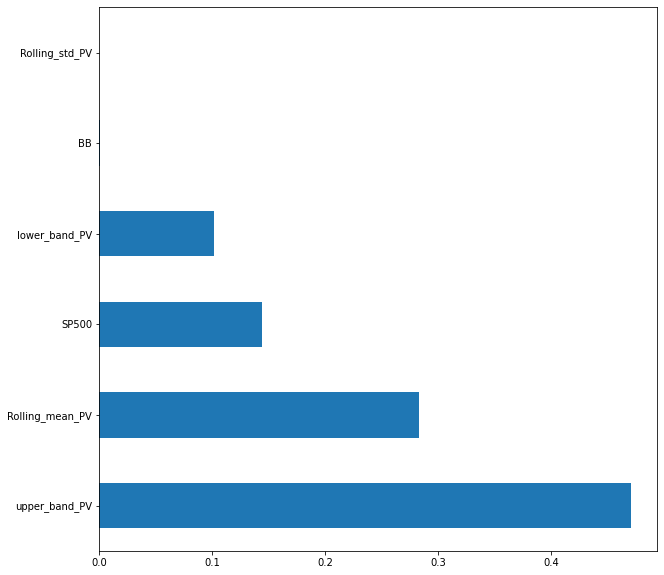

In [189]:
feat_importances = pd.Series(model.feature_importances_, index=X_head.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [182]:
y_pred=model.predict(x_test)

In [183]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,15648.902542,15612.197362
1,10138.833666,10149.533568
2,10474.599498,10392.047311
3,10153.359846,10292.561792
4,11035.505338,11153.178917
...,...,...
308,13682.887823,13704.527677
309,16658.307083,16595.106967
310,14550.819005,14525.086312
311,10593.017685,10439.016158


In [184]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 82.88669918967823
Mean Squared Error: 15294.013463892577
Root Mean Squared Error: 123.66896726298226


In [185]:
bagging = RandomForestRegressor(max_features=None)# or we can pass max_features = len(X_train.columns) = 13
bagging.fit(x_train,y_train)
print('Training score ',bagging.score(x_train,y_train))
print('Test Error ',bagging.score(x_test,y_test))

Training score  0.9997359362634579
Test Error  0.9972221851279855


In [186]:
rf = RandomForestRegressor(max_features = 1) # same as book
rf.fit(x_train,y_train)
print('Training score ',rf.score(x_train,y_train))
print('Test Error ',rf.score(x_test,y_test))

Training score  0.9991992115733455
Test Error  0.9959716891932772
